In [1]:
import pandas as pd
import warnings
import statsmodels.api as sm
import matplotlib.pyplot as plt
import glob
warnings.filterwarnings("ignore")
import glob

path =r'C:\Users\kasim\Desktop\506 Project\XML to CSV Files' # use your path
allFiles = glob.glob(path + "/*.csv")
df_1 = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
df_1 = pd.concat(list_)
df_1 = df_1.drop(['devicename', 'exit_timestamp' ], axis = 1) #dropping the columns not needed
df_1 = df.drop(df.columns[[0]], axis=1)

In [2]:
#converting the timestamps to python datetime format
df_1['entry_timestamp'] = df_1['entry_timestamp'].astype('str') 
df_1['exit_timestamp'] = df_1['exit_timestamp'].astype('str') 

In [4]:
df_1['entry_timestamp'].replace('T', ' ',regex=True,inplace=True)
df_1['exit_timestamp'].replace('T', ' ',regex=True,inplace=True)

In [5]:
#df_1['entry_timestamp'] = pd.to_datetime(df_1.entry_timestamp)
df_1['entry_timestamp'] = df_1['entry_timestamp'].apply(lambda x: x.split('T')[0])
df_1['exit_timestamp'] = df_1['exit_timestamp'].apply(lambda x: x.split('T')[0])
#df_1['exit_timestamp']  = pd.to_numeric(df_1['exit_timestamp'] )
# df_1['entry_timestamp'] = df_1['entry_timestamp'].astype(float) 
# df_1['exit_timestamp'] = df_1['exit_timestamp'].astype(float)
#df['col'] = pd.to_numeric(df['col']) 
df_1.head()

,entry_timestamp,exit_timestamp,ole,owi,ohe,speed,incr,otl,oga
0,2017-08-14 23:58:03.025,2017-08-14 23:58:05.055,10.4,8.8,7.6,545.67,6083.0,11.02,60.1
1,2017-08-14 23:58:04.623,2017-08-14 23:58:06.710,17.0,14.4,10.2,545.67,8338.0,17.32,40.7
2,2017-08-14 23:58:04.963,2017-08-14 23:58:07.016,16.6,11.0,8.6,545.67,8753.0,13.39,4.9
3,2017-08-14 23:58:05.596,2017-08-14 23:58:07.636,11.8,9.0,12.2,545.67,9608.0,12.99,13.8
4,2017-08-14 23:58:06.942,2017-08-14 23:58:09.026,16.6,12.6,12.6,545.67,11503.0,17.72,33.4


In [6]:
#dropping the nan values
df_1 = df_1.dropna(how = 'any')
df_1.head(1)

,entry_timestamp,exit_timestamp,ole,owi,ohe,speed,incr,otl,oga
0,2017-08-14 23:58:03.025,2017-08-14 23:58:05.055,10.4,8.8,7.6,545.67,6083.0,11.02,60.1


In [8]:
#calculating columns
df_1['Volume'] = df_1.ole * df_1.owi * df_1.ohe
df_1.head(1)

,entry_timestamp,exit_timestamp,ole,owi,ohe,speed,incr,otl,oga,Volume
0,2017-08-14 23:58:03.025,2017-08-14 23:58:05.055,10.4,8.8,7.6,545.67,6083.0,11.02,60.1,695.552


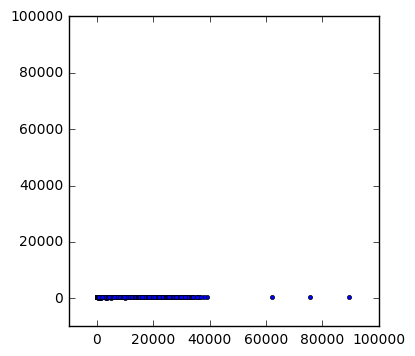

In [24]:
#Plot between volume and speed

plt.plot(df_1['Volume'],df_1['speed'],'o',markersize=3)
plt.axis('square')
plt.xlim([-10000,100000])
_ = plt.ylim([-10000,100000])
plt.show()

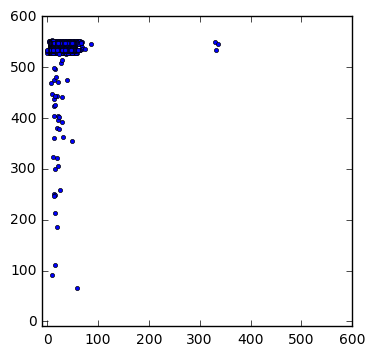

In [28]:
#Plot between otl and speed
plt.plot(df_1['otl'],df_1['speed'],'o',markersize=3)
plt.axis('square')
plt.xlim([-10,600])
_ = plt.ylim([-10,600])
plt.show()

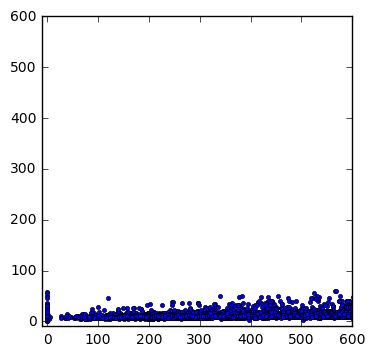

In [33]:
#Plot between volume and otl

plt.plot(df_1['Volume'],df_1['otl'],'o',markersize=3)
plt.axis('square')
plt.xlim([-10,600])
_ = plt.ylim([-10,600])
plt.show()